Análise do COVID usando regressão linear, exponencial e modelo sigmóide.

In [19]:
using CSV, DataFrames, Plots
gr()
plot(rand(3), rand(3))
nothing

In [15]:
data = CSV.read("covid.csv")
rename!(data, Dict(
        Symbol("Countries and territories") => "CountryExp",
        :Cases => "NewConfCases"
    ))
first(data, 5)

,DateRep,Day,Month,Year,NewConfCases,Deaths,CountryExp,GeoId
,String,Int64,Int64,Int64,Int64,Int64,String,String
1,3/17/2020,17,3,2020,5,0,Afghanistan,AF
2,3/16/2020,16,3,2020,6,0,Afghanistan,AF
3,3/15/2020,15,3,2020,3,0,Afghanistan,AF
4,3/11/2020,11,3,2020,3,0,Afghanistan,AF
5,3/8/2020,8,3,2020,3,0,Afghanistan,AF


In [18]:
df = data[findall(data[:CountryExp] .== "Italy"),:]

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[18]:1
└ @ Core In[18]:1


,DateRep,Day,Month,Year,NewConfCases,Deaths,CountryExp,GeoId
,String,Int64,Int64,Int64,Int64,Int64,String,String
1,3/17/2020,17,3,2020,4000,347,Italy,IT
2,3/16/2020,16,3,2020,6230,370,Italy,IT
3,3/15/2020,15,3,2020,90,173,Italy,IT
4,3/14/2020,14,3,2020,2547,252,Italy,IT
5,3/13/2020,13,3,2020,2651,189,Italy,IT
6,3/12/2020,12,3,2020,2313,196,Italy,IT
7,3/11/2020,11,3,2020,977,167,Italy,IT
8,3/10/2020,10,3,2020,1797,98,Italy,IT
9,3/9/2020,9,3,2020,1492,133,Italy,IT


In [20]:
y = reverse(df.NewConfCases);

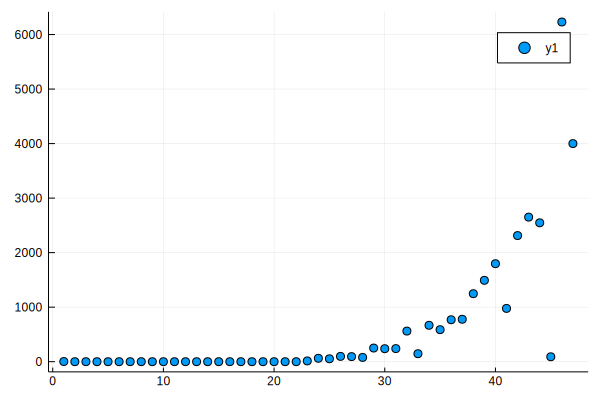

In [21]:
scatter(y[findfirst(y .> 0):end])

In [22]:
y = reverse(df.NewConfCases);
y = y[findfirst(y .> 0):end]

47-element Array{Int64,1}:
    3
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    ⋮
  769
  778
 1247
 1492
 1797
  977
 2313
 2651
 2547
   90
 6230
 4000

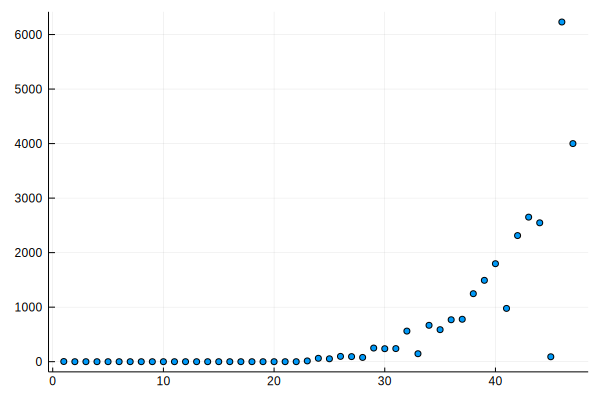

In [23]:
scatter(y, ms=3, leg=false)

## Quadrados Mínimos

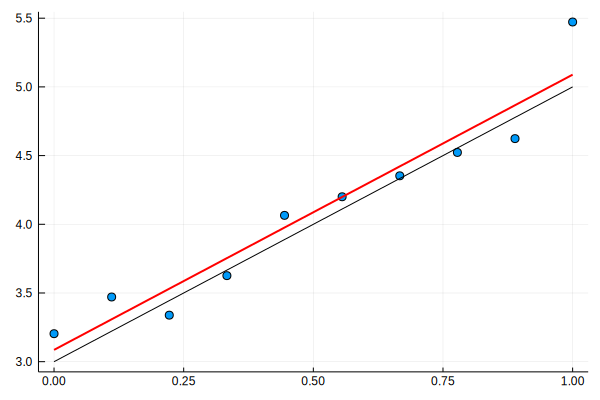

In [24]:
using Random

Random.seed!(0)
n = 10
x = range(0, 1, length=n)
y = 2x .+ 3 + randn(n) * 0.3
scatter(x, y, leg=false)
plot!(x, 2x .+ 3, c=:black)

M = [n  sum(x);  sum(x)   sum(x.^2)]
c = [sum(y);  sum(x .* y)]

β = M \ c
plot!(x, β[1] .+ β[2] * x, c=:red, lw=2)

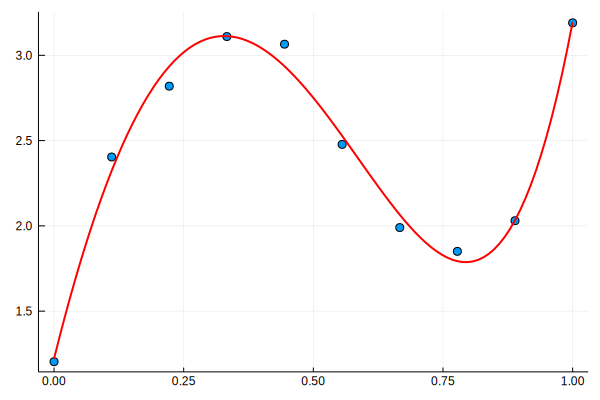

In [25]:
using Random

Random.seed!(0)
n = 10
x = range(0, 1, length=n)
y = exp.(x) + sin.(2π * x) + 4 * x .* (1 .- x) + randn(n) * 0.3
scatter(x, y, leg=false)

X = [ones(n) x x.^2 x.^3 sin.(x)]

M = X' * X
c = X' * y

β = M \ c

xg = range(minimum(x), maximum(x), length=100)
X = [ones(length(xg)) xg xg.^2 xg.^3 sin.(xg)]
plot!(xg, X * β, c=:red, lw=2)

## COVID-19

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[60]:1
└ @ Core In[60]:1


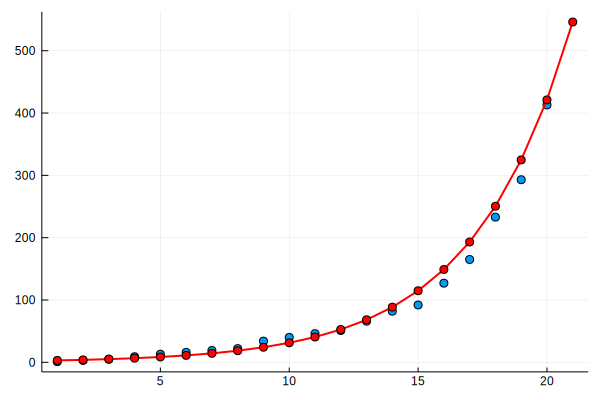

In [60]:
df = data[findall(data[:CountryExp] .== "Canada"),:]
y = reverse(df.NewConfCases);

# A partir de quando Δy > 0
#y = y[findlast(y .== 0)+1:end]

y = cumsum(y[findlast(y .== 0)+1:end])
#y = cumsum(y[findfirst(y .> 0):end])

n = length(y)
x = range(1, n, length=n)

X = [ones(n)  x]
ytil = log.(y)

M = X' * X
c = X' * ytil

β = M \ c

scatter(x, y, leg=false)

xg = range(1, n + 1, length=n+1)
#xg = range(1, n, length=n)
X = [ones(length(xg))  xg]
plot!(xg, exp.(X * β), c=:red, lw=2)
scatter!(xg, exp.(X * β), c=:red, lw=2)

In [50]:
unique(data[:CountryExp])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[50]:1
└ @ Core In[50]:1


145-element Array{String,1}:
 "Afghanistan"                
 "Albania"                    
 "Algeria"                    
 "Andorra"                    
 "Antigua_and_Barbuda"        
 "Argentina"                  
 "Armenia"                    
 "Australia"                  
 "Austria"                    
 "Azerbaijan"                 
 "Bahamas"                    
 "Bahrain"                    
 "Bangladesh"                 
 ⋮                            
 "Trinidad_and_Tobago"        
 "Tunisia"                    
 "Turkey"                     
 "Ukraine"                    
 "United_Arab_Emirates"       
 "United_Kingdom"             
 "United_Republic_of_Tanzania"
 "United_States_of_America"   
 "Uruguay"                    
 "Uzbekistan"                 
 "Venezuela"                  
 "Vietnam"                    

## Regressão Não-Linear

In [29]:
using NLPModels, NLPModelsIpopt

In [57]:
df = data[findall(data[:CountryExp] .== "Canada"),:]
y = reverse(df.NewConfCases);
#y = y[1:end-1]
# A partir de quando Δy > 0
#y = y[findlast(y .== 0)+1:end]

y = cumsum(y[findlast(y .== 0)+1:end])

n = length(y)
x = range(1, n, length=n)
x = range(0, 1, length=n)

h(β, x) = β[3] / (1 + exp(-β[1] - β[2] * x))
nlp = ADNLPModel(
    β -> 0.5 * sum( (y[i] - h(β, x[i]))^2 for i = 1:n),
    [-5.53; 5.76; 4e4],
    uvar=[0.0; Inf; Inf]
)

output = ipopt(nlp)
print(output)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[57]:1
└ @ Core In[57]:1


This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        1
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

  status: "first-order stationary"
  objective value: 711.3089265160069
  primal feasibility: 0.0
  dual feasibility: 6.450521229276971e-10
  solution: [-18.450121526342258  5.135166441777977  2.41805634270887e8]
  iterations: 1289
  elapsed time: 0.903
  solver specific:
    multipliers_U: [1.1748467753199323e-9  0.0  0.0]
    multipliers_L: [0.0  0.0  0.0]
    multipliers_con: ∅
    internal_msg: :Solve_Succeeded


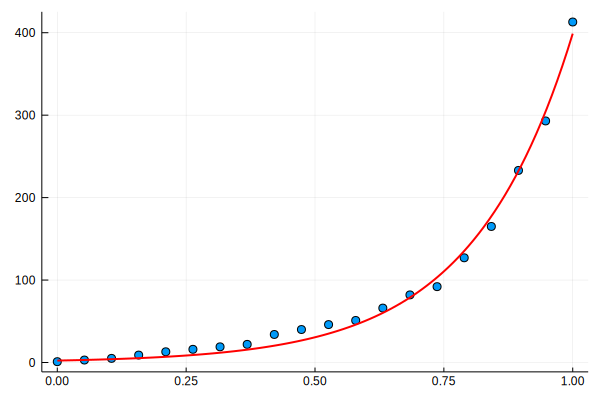

In [59]:
scatter(x, y, leg=false)
β = output.solution

#xg = range(1, n, length=100)
xg = range(0, 1.0, length=100)
hx = [h(β, xi) for xi in xg]

plot!(xg, hx, c=:red, lw=2)

## Análise

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[83]:3
└ @ Core ./In[83]:3


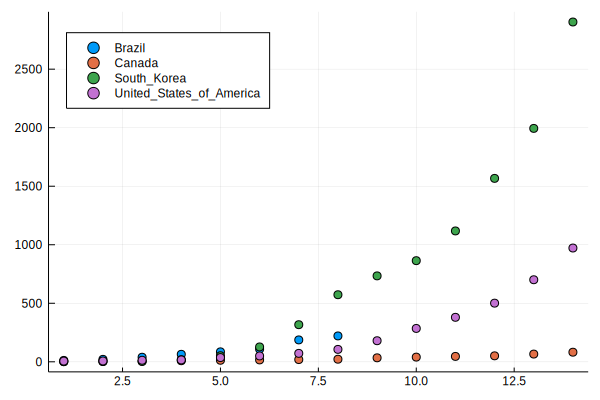

In [83]:
plot()
for c in ["Brazil", "Canada", "South_Korea", "United_States_of_America"]
    df = data[findall(data[:CountryExp] .== c),:]
    y = reverse(df.NewConfCases);
    #y = cumsum(y[findfirst(y .> 0):end])
    y = cumsum(y[findlast(y .== 0)+1:end])
    y = y[1:min(14, length(y))]

    scatter!(y, label=c)
end
plot!(legend=:topleft)